Import the necessary packages

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sheet1.csv consists of a response_text column to a therapy chatbot. Bot said 'describe a time when you have acted as a resource for someone else.' If a response is 'not flagged', the user can continue talking to the bot. If it is 'flagged', the user is referred to help.

In [9]:
chatbot = pd.read_csv('sheet1.csv')

In [10]:
chatbot.head()

,response_id,class,response_text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,response_1,not_flagged,I try and avoid this sort of conflict,NaN,NaN,NaN,NaN,NaN
1,response_2,flagged,Had a friend open up to me about his mental ad...,NaN,NaN,NaN,NaN,NaN
2,response_3,flagged,I saved a girl from suicide once. She was goin...,NaN,NaN,NaN,NaN,NaN
3,response_4,not_flagged,i cant think of one really...i think i may hav...,NaN,NaN,NaN,NaN,NaN
4,response_5,not_flagged,Only really one friend who doesn't fit into th...,,NaN,NaN,NaN,NaN


In [11]:
chatbot = pd.read_csv('sheet1.csv', usecols=('response_id','class',"response_text"))
resume = pd.read_csv('sheet2.csv',encoding='latin-1')

In [12]:
chatbot.head(5)

,response_id,class,response_text
0,response_1,not_flagged,I try and avoid this sort of conflict
1,response_2,flagged,Had a friend open up to me about his mental ad...
2,response_3,flagged,I saved a girl from suicide once. She was goin...
3,response_4,not_flagged,i cant think of one really...i think i may hav...
4,response_5,not_flagged,Only really one friend who doesn't fit into th...


In [13]:
chatbot['class'].value_counts()

not_flagged    55
flagged        25
Name: class, dtype: int64

In [45]:
import nltk
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
from wordcloud import WordCloud, STOPWORDS
import matplotlib as plty
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

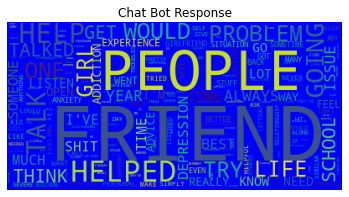

In [46]:
def cloud(text):
    wordcloud = WordCloud(background_color="blue",stopwords=stop).generate(" ".join([i for i in text.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Chat Bot Response")
cloud(chatbot['response_text'])

# Model Building

In [95]:
from sklearn import preprocessing
Encode = preprocessing.LabelEncoder()

In [50]:
chatbot['Label'] = Encode.fit_transform(chatbot['class'])

In [96]:
chatbot['Label'].value_counts()

1    55
0    25
Name: Label, dtype: int64

In [78]:
x=chatbot.response_text
y=chatbot.Label

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)

# Naive Bayes theorem

In [97]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()

In [101]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)
x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)
NB.fit(x_train_dtm,y_train)
y_predict = NB.predict(x_test_dtm)

In [105]:
from sklearn.metrics import confusion_matrix

In [111]:
print(accuracy_score(y_test,y_predict))

0.7


## Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression

In [84]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
predictions = logmodel.predict(x_test)

In [87]:
from sklearn.metrics import classification_report

In [88]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.87      0.93        15

    accuracy                           0.90        20
   macro avg       0.86      0.93      0.88        20
weighted avg       0.93      0.90      0.90        20



# KMeans

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
# Create Data
data = make_blobs(n_samples=200, n_features=2, 
                           centers=4, cluster_std=1.8,random_state=101)

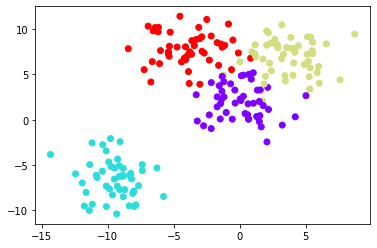

In [123]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

In [126]:
from sklearn.cluster import KMeans as k_means

In [129]:
kmeans = k_means(n_clusters=4)

In [130]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [131]:
kmeans.cluster_centers_

array([[-4.13591321,  7.95389851],
       [-9.46941837, -6.56081545],
       [ 3.71749226,  7.01388735],
       [-0.0123077 ,  2.13407664]])

In [132]:
kmeans.labels_

array([0, 2, 3, 2, 2, 1, 2, 3, 2, 3, 0, 3, 2, 2, 0, 3, 2, 3, 1, 0, 1, 3,
       3, 1, 0, 1, 1, 3, 2, 2, 0, 1, 2, 3, 3, 0, 1, 1, 1, 3, 1, 0, 0, 0,
       3, 2, 0, 3, 1, 3, 3, 0, 2, 3, 1, 0, 3, 3, 0, 2, 1, 2, 1, 0, 2, 3,
       1, 2, 2, 1, 2, 3, 1, 3, 1, 2, 2, 3, 0, 3, 3, 1, 2, 1, 3, 3, 3, 0,
       3, 1, 1, 1, 1, 3, 3, 1, 2, 0, 1, 2, 3, 1, 3, 3, 2, 3, 1, 2, 1, 1,
       2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 3, 0, 3, 0, 3, 2, 0, 3, 1, 0, 0, 0,
       3, 1, 1, 0, 2, 0, 2, 3, 1, 2, 1, 0, 0, 2, 3, 1, 0, 0, 0, 0, 3, 2,
       3, 0, 2, 2, 2, 3, 2, 3, 3, 0, 1, 0, 3, 2, 0, 3, 2, 3, 0, 2, 3, 0,
       2, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 2, 2, 0, 1, 3, 2, 2,
       1, 3], dtype=int32)

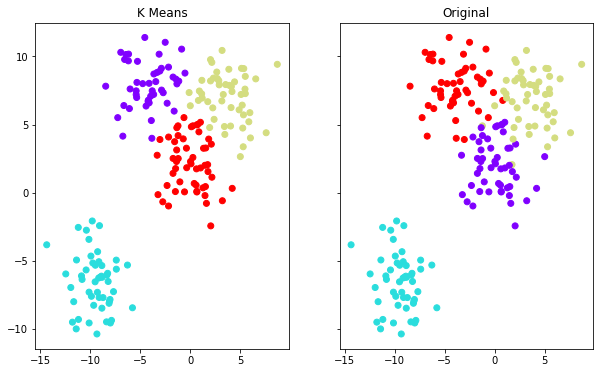

In [133]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')